# SUPPORT VECTOR MACHINE

Task 1: Exploratory Data Analysis (EDA)

1.	Load the dataset and perform fundamental data exploration.

2.	Utilize histograms, box plots, or density plots to understand feature distributions.

3.	Investigate feature correlations to discern relationships within the data.

Task 2: Data Preprocessing

1.	Encode categorical variables if necessary.

2.	Split the dataset into training and testing sets.

Task 3: Data Visualization

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships.

2.	Visualize class distributions to gauge dataset balance or imbalance.

Task 4: SVM Implementation

1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

2.	Train the SVM model on the training data.

3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

Task 5: Visualization of SVM Results

1.	Visualize classification results on the testing data.

Task 6: Parameter Tuning and Optimization

1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

Task 7: Comparison and Analysis

1.	Compare SVM performance with various kernels (e.g., linear, polynomial, radial basis function).

2.	Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

3.	Discuss practical implications of SVM in real-world classification tasks.



In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [122]:
df = pd.read_csv('Pharma_Industry.csv')

In [123]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [125]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [126]:
df.isnull().sum()

,0
Drug Dosage (mg),0
Systolic Blood Pressure (mmHg),0
Heart Rate (BPM),0
Liver Toxicity Index (U/L),0
Blood Glucose Level (mg/dL),0
Drug Response,0


In [127]:
features = ['Drug Dosage (mg)', 'Systolic Blood Pressure (mmHg)', 'Heart Rate (BPM)',
            'Liver Toxicity Index (U/L)', 'Blood Glucose Level (mg/dL)']


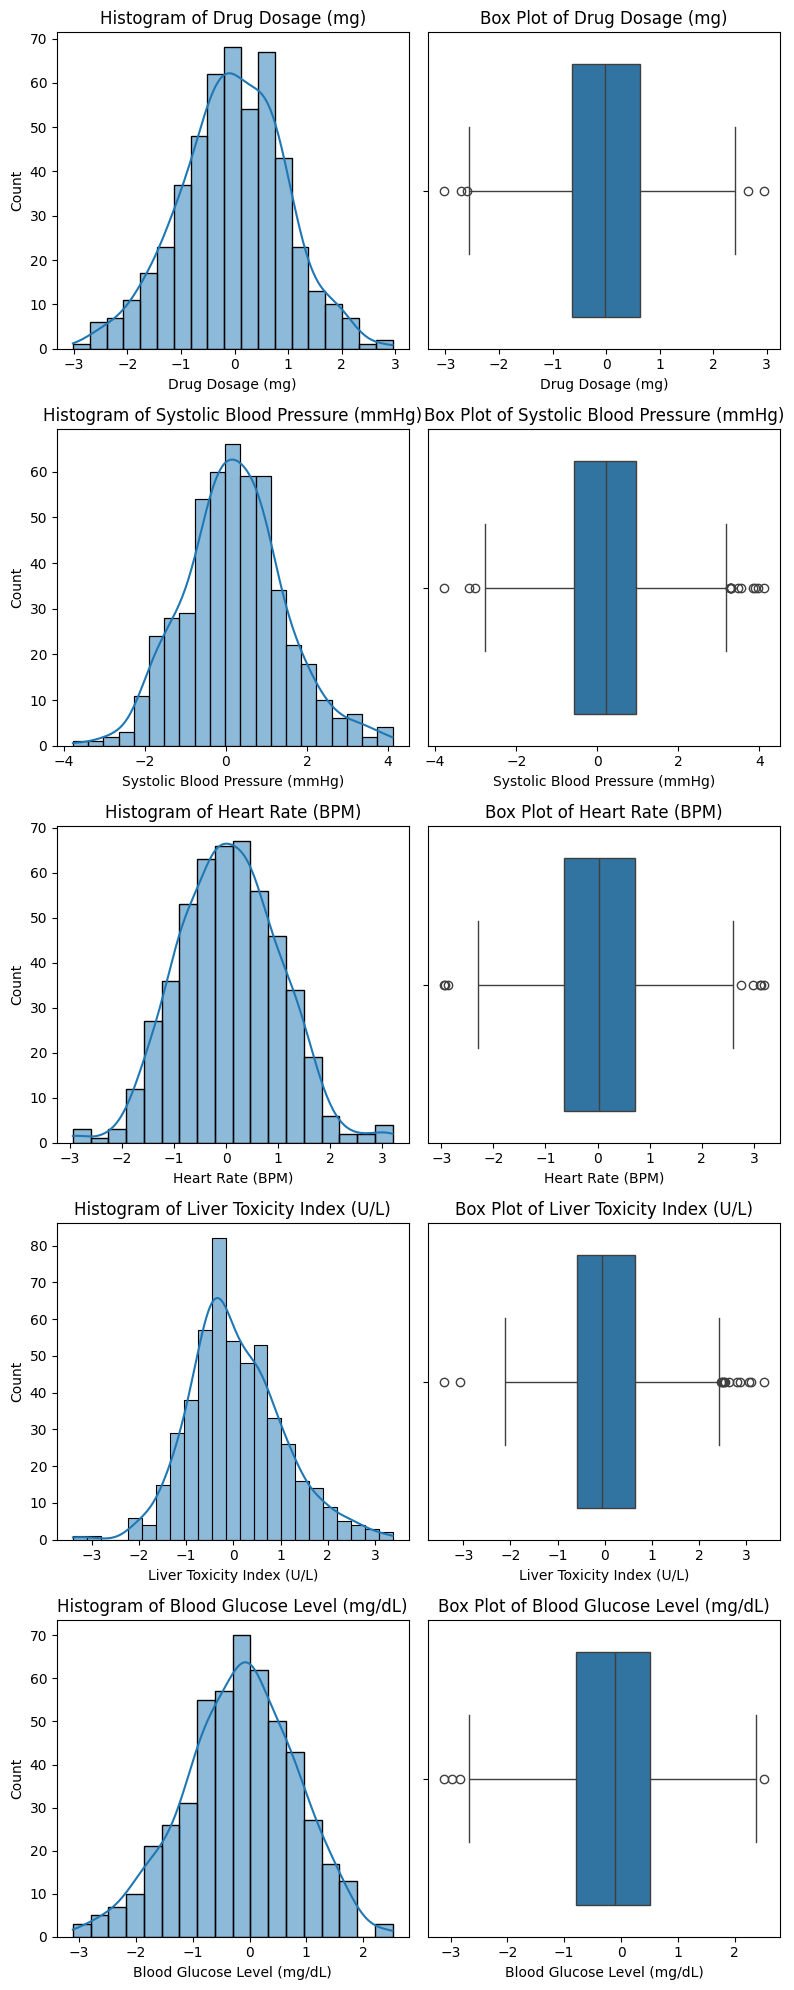

In [128]:
plt.figure(figsize=(8, len(features)*4))

for i, feature in enumerate(features):
    plt.subplot(len(features), 2, 2*i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)

    plt.subplot(len(features), 2, 2*i + 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

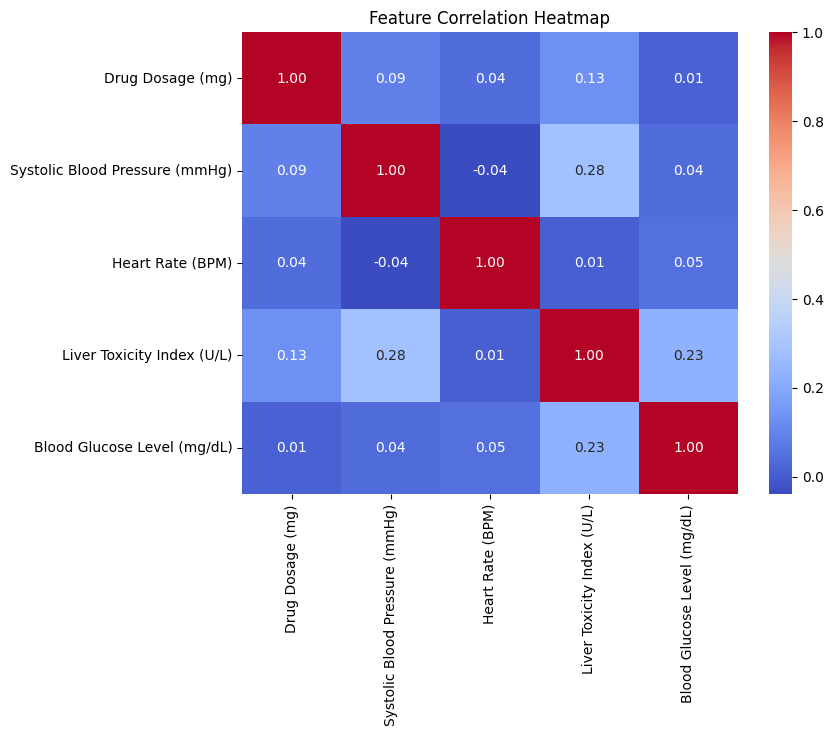

In [129]:
plt.figure(figsize=(8, 6))
correlation = df[features].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [130]:
categorical = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [131]:
df_encoded = df.copy()
if categorical:
    data_encoded = pd.get_dummies(data_encoded, columns=categorical)

In [132]:
X = df_encoded.drop('Drug Response', axis=1)
y = df_encoded['Drug Response']


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [134]:
X_train.shape

(400, 5)

In [135]:
X_test.shape

(100, 5)

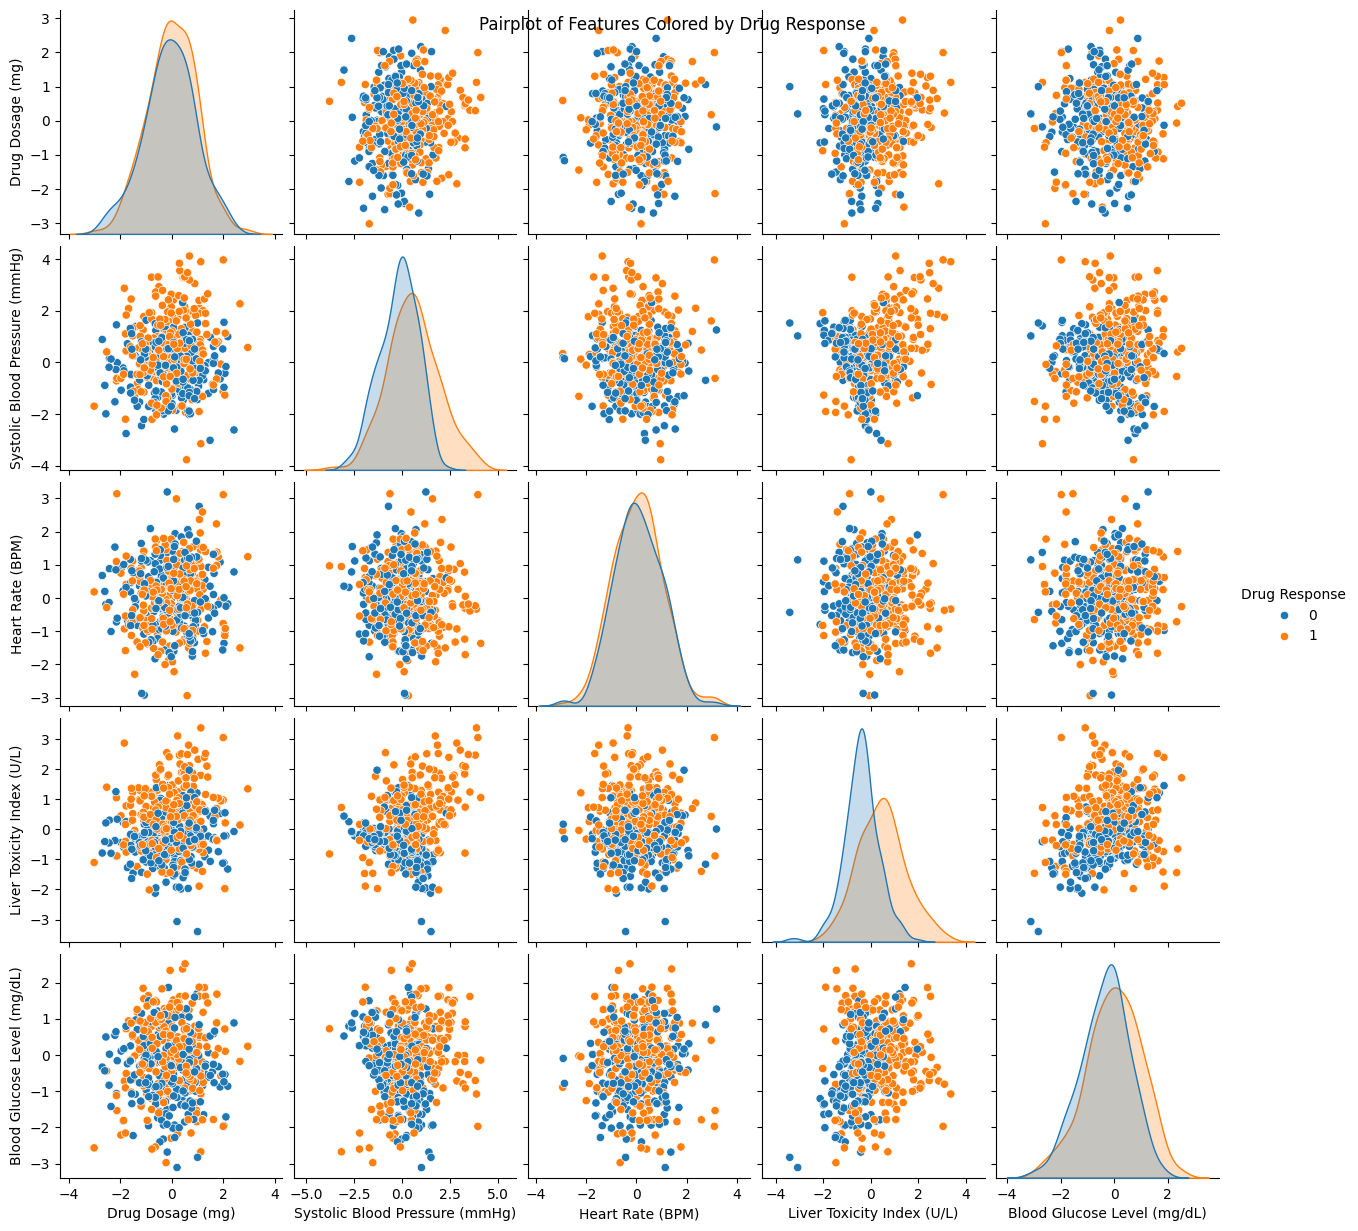

In [136]:
sns.pairplot(df, hue="Drug Response", diag_kind='kde')
plt.suptitle("Pairplot of Features Colored by Drug Response")
plt.show()

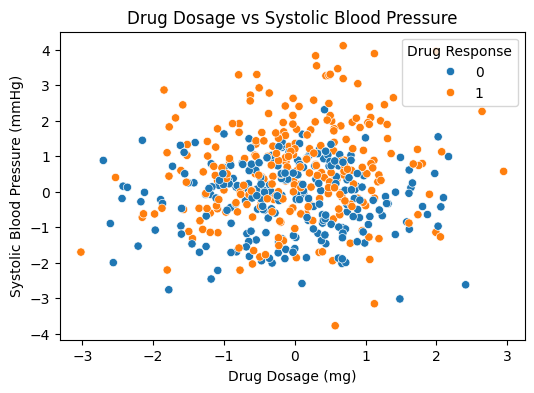

In [137]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Drug Dosage (mg)', y='Systolic Blood Pressure (mmHg)', hue='Drug Response', data=df)
plt.title('Drug Dosage vs Systolic Blood Pressure')
plt.show()

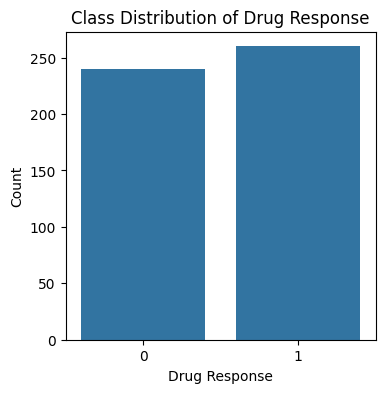

In [138]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Drug Response', data=df)
plt.title('Class Distribution of Drug Response')
plt.xlabel('Drug Response')
plt.ylabel('Count')
plt.show()

In [139]:
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


In [140]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.820


In [141]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.3f}")

Precision: 0.865


In [142]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.3f}")

Recall: 0.804


In [143]:
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.3f}")

F1-score: 0.833


In [144]:
#DATA VISUALISATION

In [145]:
feat1 = 'Drug Dosage (mg)'
feat2 = 'Systolic Blood Pressure (mmHg)'


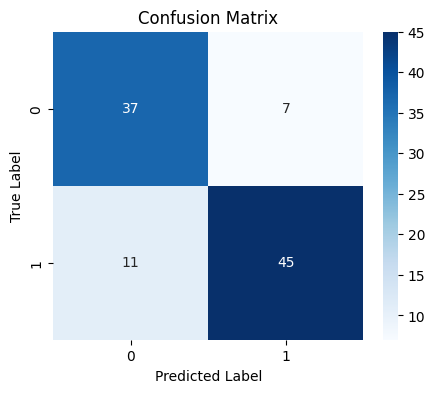

In [146]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

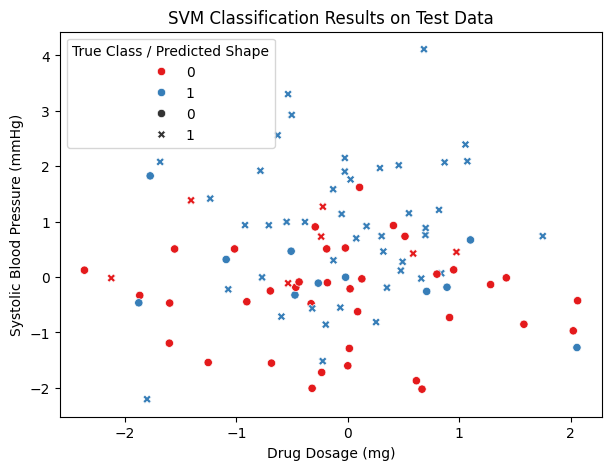

In [147]:
plt.figure(figsize=(7, 5))
sns.scatterplot(
    x=X_test[feat1], y=X_test[feat2],
    hue=y_test, style=y_pred,
    palette='Set1'
)
plt.title('SVM Classification Results on Test Data')
plt.xlabel('Drug Dosage (mg)')
plt.ylabel("Systolic Blood Pressure (mmHg)")
plt.legend(title='True Class / Predicted Shape')
plt.show()

In [148]:
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto']}

In [149]:
grid = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [150]:
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Score: {:.3f}".format(grid.best_score_))

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.740


In [151]:
y_pred = grid.best_estimator_.predict(X_test)
print("Test Results:\n", classification_report(y_test, y_pred))

Test Results:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.87      0.82      0.84        56

    accuracy                           0.83       100
   macro avg       0.83      0.83      0.83       100
weighted avg       0.83      0.83      0.83       100



In [152]:
kernels = ['linear','poly','rbf']
results = {}
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    print(f"\nSVM with {kernel} kernel\n")
    print(classification_report(y_test, y_pred))
    results[kernel] = svm.score(X_test, y_test)


SVM with linear kernel

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.84      0.75      0.79        56

    accuracy                           0.78       100
   macro avg       0.78      0.78      0.78       100
weighted avg       0.79      0.78      0.78       100


SVM with poly kernel

              precision    recall  f1-score   support

           0       0.60      0.89      0.72        44
           1       0.86      0.54      0.66        56

    accuracy                           0.69       100
   macro avg       0.73      0.71      0.69       100
weighted avg       0.74      0.69      0.68       100


SVM with rbf kernel

              precision    recall  f1-score   support

           0       0.77      0.84      0.80        44
           1       0.87      0.80      0.83        56

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weig

In [153]:
#Analyze SVM strengths and weaknesses for the dataset based on EDA and visualization results.

'''Strengths:
 1.Handles multidimensional data well (our dataset has 5 numeric features).
 2.Effective at finding decision boundaries especially visible in EDA and scatterplots.

Weaknesses:
 5.Might require careful tuning of hyperparameters like kernel, C, and gamma.
 4.May be sensitive to outliers and noisy data.
 3.Visualizations suggest some overlap in feature distributions which might limit SVM's perfect separation.'''

"Strengths:\n 1.Handles multidimensional data well (our dataset has 5 numeric features).\n 2.Effective at finding decision boundaries especially visible in EDA and scatterplots.\n\nWeaknesses:\n 5.Might require careful tuning of hyperparameters like kernel, C, and gamma.\n 4.May be sensitive to outliers and noisy data.\n 3.Visualizations suggest some overlap in feature distributions which might limit SVM's perfect separation."

In [154]:
#	Discuss practical implications of SVM in real-world classification tasks.
'''
Powerful for varied domains like healthcare, finance, or bioinformatics, especially with non-linear relationships.

SVM's margin maximization helps reduce overfitting, improving generalization on unseen data.

Performance and ease of use can be limited by computational cost on large datasets and necessity of kernel/hyperparameter selection.'''

"\nPowerful for varied domains like healthcare, finance, or bioinformatics, especially with non-linear relationships.\n\nSVM's margin maximization helps reduce overfitting, improving generalization on unseen data.\n\nPerformance and ease of use can be limited by computational cost on large datasets and necessity of kernel/hyperparameter selection."